In [0]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [0]:
import numpy as np

In [0]:
print("Training data shape: ", x_train.shape) # (60000, 28, 28) -- 60000 images, each 28x28 pixels
print("Test data shape", x_test.shape) # (10000, 28, 28) -- 10000 images, each 28x28

# Flatten the images
image_vector_size = 28*28
x_train = x_train.reshape(x_train.shape[0], image_vector_size)
x_test = x_test.reshape(x_test.shape[0], image_vector_size)

Training data shape:  (60000, 28, 28)
Test data shape (10000, 28, 28)


In [0]:
print("Training data shape: ", x_train.shape) # (60000, 28, 28) -- 60000 images, each 28x28 pixels
print("Test data shape", x_test.shape) # (10000, 28, 28) -- 10000 images, each 28x28

Training data shape:  (60000, 784)
Test data shape (10000, 784)


In [0]:
# Function to extract the classes
def extract_2classes(class0, class1, X, Y):
    # Select class #0
    X_0 = X[Y == class0]
    Y_0 = Y[Y == class0]
    # Select class #1
    X_1 = X[Y == class1]
    Y_1 = Y[Y == class1]
    # Join the two classes to make the set
    X_2classes = np.vstack((X_0, X_1))
    Y_2classes = np.append(Y_0, Y_1)
    return X_2classes, Y_2classes

In [0]:
from sklearn.model_selection import train_test_split
X_train_2classes, Y_train_2classes = extract_2classes(5, 7, x_train, y_train)
X_test_2classes, Y_test_2classes = extract_2classes(5, 7,x_test, y_test)

X = np.vstack([X_train_2classes,X_test_2classes])

Y = np.hstack([Y_train_2classes,Y_test_2classes])

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.5, random_state=42)

X = np.vstack([X_train,X_test])

Y = np.hstack([Y_train,Y_test])


print(X_train_2classes.shape,X.shape)
print(Y_train_2classes.shape,Y.shape)

(11686, 784) (13606, 784)
(11686,) (13606,)


In [0]:
print("Training data shape: ", X_train_2classes.shape) # (60000, 28, 28) -- 60000 images, each 28x28 pixels
print("Test data shape", X_test_2classes.shape) # (10000, 28, 28) -- 10000 images, each 28x28

Training data shape:  (11686, 784)
Test data shape (1920, 784)


In [0]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Perceptron

def predict(train_features,test_features,train_labels): 
    clf = Perceptron(tol=1e-3, random_state=0)
    # Fitting the data into the model
    clf.fit(train_features, train_labels)
    # Predicting the labels for test data
    predicted_values = clf.predict(test_features)
    return predicted_values
    
def calc_accuracy(train_features,test_features,train_labels,test_labels):
    # Calling predict function to get the predicted labels of test data
    pred = predict(train_features,test_features,train_labels)
    return accuracy_score(pred, test_labels)
  

In [0]:
calc_accuracy(X_train_2classes,X_test_2classes,Y_train_2classes,Y_test_2classes)

0.9895833333333334

In [0]:
import matplotlib.pyplot as plt
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X_train_2classes, Y_train_2classes, test_size=0.001, random_state=42)
# print(X_train.shape,X_test.shape)

[99.53939631517052, 99.9607996863975, 99.40225379715825, 99.97060264576189]
[99.71826311112204]
[99.85299522234473, 99.89894350022968, 99.82544786403307, 99.34772622875516, 99.85300872760679]
[99.71826311112204, 99.75562430859388]
[99.8677015346622, 99.84124184159464, 99.75304286470276, 99.65602399012171, 99.86771320222242, 99.66487344563014]
[99.71826311112204, 99.75562430859388, 99.77509947982232]
[99.91425141485165, 99.94855084891098, 99.69987995198079, 99.77705367861431, 99.84565254673298, 99.71705393123554, 99.91425876704108]
[99.71826311112204, 99.75562430859388, 99.77509947982232, 99.8309573056239]
[99.93280134397313, 99.8320033599328, 99.8740025199496, 99.97480050398993, 99.80680386392272, 99.84040319193616, 99.73962707878381, 99.84881572316479]
[99.71826311112204, 99.75562430859388, 99.77509947982232, 99.8309573056239, 99.8561571982066]


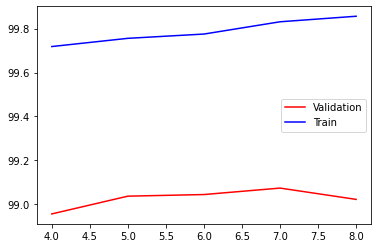

In [0]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold
accuracy=[]
trainaccuracy=[]
for i in range(4,9):
  kf = KFold(n_splits=i,shuffle=False)
  kf.split(X)    
      
  # Initialize the accuracy of the models to blank list. The accuracy of each model will be appended to this list
  accuracy_model = []
  trainaccuracy_model=[]
  
  # Iterate over each train-test split
  for train_index, test_index in kf.split(X):
      clf = Perceptron(tol=1e-3, random_state=0)
      # Split train-test
      X_train, X_test = X[train_index], X[test_index]
      y_train, y_test = Y[train_index], Y[test_index]
      # Train the model
      model = clf.fit(X_train, y_train)
      # Append to accuracy_model the accuracy of the model
      accuracy_model.append(accuracy_score(y_test, model.predict(X_test), normalize=True)*100)
      trainaccuracy_model.append(accuracy_score(y_train, model.predict(X_train), normalize=True)*100)
  
  # Print the accuracy    
  print(trainaccuracy_model)
  accuracy.append(sum(accuracy_model)/(len(accuracy_model)))
  trainaccuracy.append(sum(trainaccuracy_model)/(len(trainaccuracy_model)))
  print(trainaccuracy)
plt.plot(range(4,9),accuracy,label="Validation",color="Red")
plt.plot(range(4,9),trainaccuracy,label="Train",color="Blue")
plt.legend()

